<h1>Dask Delayed - Lazy execution scheduler</h1>

Set up session by importing from dask.distributed and dask delayed

In [1]:
import sys
import os
from dask.distributed import Client
from dask import delayed

Create a cluster, or use default multi-threaded cluster

In [2]:
client = Client() #This creates a local (pc) multi-process cluster

In [3]:
client

Client Scheduler: tcp://127.0.0.1:43543 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 33.57 GB


Show dashboard address (default is localhost:8787)

In [4]:
client.scheduler_info()['services']

{'dashboard': 8787}

Getting to the dashboard can be a little tricky due to network restrictions.  
The easiest way is run code and dashboard on your laptop.  
If running code on GML server, ssh into the same server in a new terminal window
and create a local redirect:

    ssh nimbus3 -L 8787:localhost:8787
    
and then open a browser window and goto this address:

    http://localhost:8787

Create some functions that simulate work

In [5]:
from time import sleep
def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

Run

In [6]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 178 ms, sys: 19.9 ms, total: 198 ms
Wall time: 3 s


Parallelize by using delayed syntax

In [7]:
%%time
# This runs immediately, all it does is build a graph

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 374 µs, sys: 1.11 ms, total: 1.48 ms
Wall time: 1.02 ms


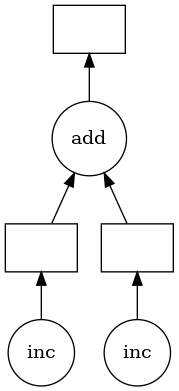

In [8]:
z.visualize()

No work has been done in the loop yet until we compute().
Note that that add function can accept delayed inputs (x & y)

In [9]:
%%time
z.compute()

CPU times: user 126 ms, sys: 16.9 ms, total: 143 ms
Wall time: 2.03 s


5

Similarly with a delayed loop, we can parallelize the operations

In [10]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [11]:
%%time
# Sequential code

results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

CPU times: user 420 ms, sys: 56.4 ms, total: 477 ms
Wall time: 8.01 s


CPU times: user 24.4 ms, sys: 9.62 ms, total: 34.1 ms
Wall time: 197 ms


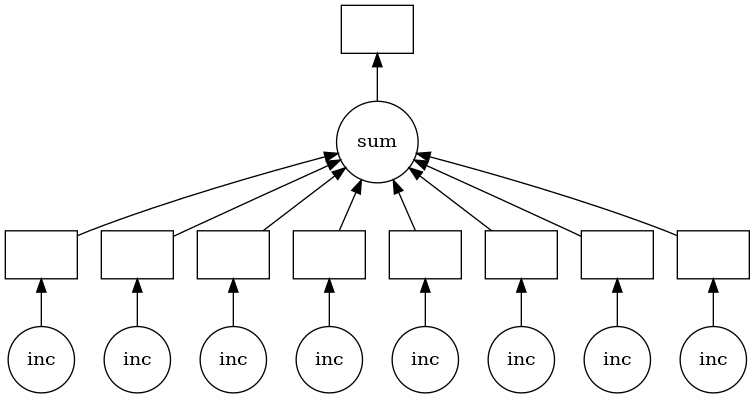

In [12]:
%%time
# Parallel code
results=[]
for x in data:
    y=delayed(inc)(x) 
    results.append(y)
total=delayed(sum)(results)
total.visualize()

In [13]:
%%time
results=total.compute()

CPU times: user 119 ms, sys: 18.8 ms, total: 138 ms
Wall time: 2.03 s


In [ ]:
results

Clean up client if we started one.

In [14]:
client.shutdown()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
